In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
%matplotlib inline

# 1. Загрузить файл hr.csv.

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

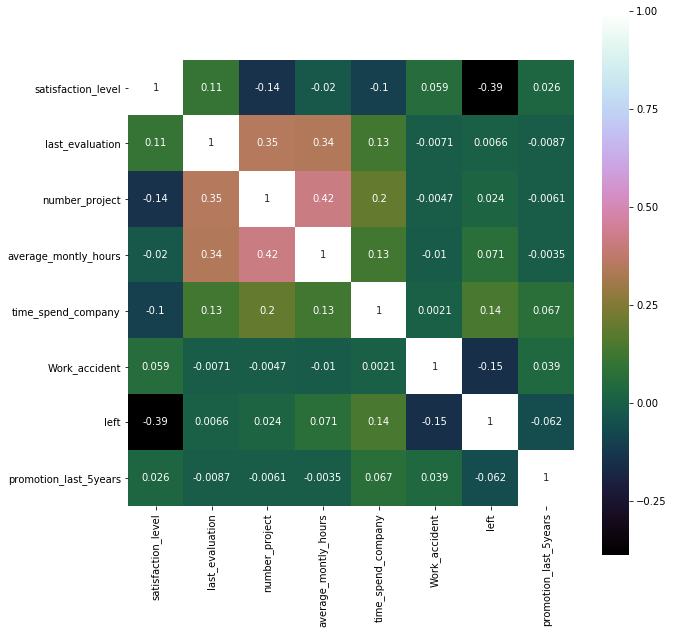

In [3]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

# 6. Рассчитать сколько работников работает в каждом департаменте.

In [4]:
work = df[df['left']==0]
department = work['sales'].value_counts().sort_values(ascending=False)
department

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

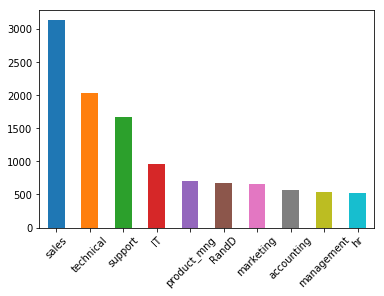

In [5]:
department.plot(kind='bar', rot=45)

# 7. Показать распределение сотрудников по зарплатам.

In [6]:
df_salary = df.groupby('salary')[['salary']].count()
df_salary

,salary
salary,
high,1237
low,7316
medium,6446


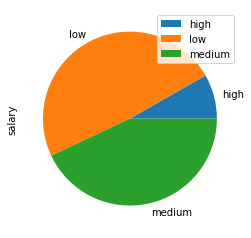

In [7]:
df_salary.plot(kind='pie', y='salary')

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [8]:
salary_department = df.groupby(['salary', 'sales'])[['salary']].count()
salary_department

salary
salary sales              
high   IT               83
       RandD            51
       accounting       74
       hr               45
       management      225
       marketing        80
       product_mng      68
       sales           269
       support         141
       technical       201
low    IT              609
       RandD           364
       accounting      358
       hr              335
       management      180
       marketing       402
       product_mng     451
       sales          2099
       support        1146
       technical      1372
medium IT              535
       RandD           372
       accounting      335
       hr              359
       management      225
       marketing       376
       product_mng     383
       sales          1772
       support         942
       technical      1147

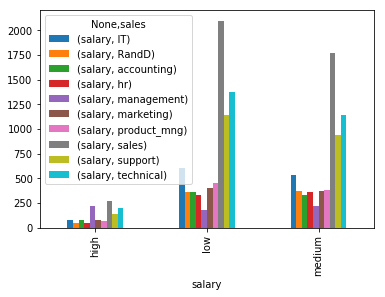

In [9]:
salary_department.unstack().plot(kind='bar')

# 9. Сколько сотрудников покинули компанию.

In [10]:
df[df['left']==1].shape

(3571, 10)